# Phase 1 Exploratory Data Analysis

In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as mn
import os
import yellowbrick 
import matplotlib
#import pydotplus
#import graphviz 


from pandas.plotting import scatter_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading the Data

In [2]:
#7 CSV Files Saved Locally on Desktop
dfstudentinfo = pd.read_csv("studentInfo.csv")
dfstudentasses = pd.read_csv("studentAssessment.csv")
dfvle = pd.read_csv("vle.csv")
dfstudentvle = pd.read_csv("studentVle.csv")
dfstudentreg = pd.read_csv ("studentRegistration.csv")
dfcourses = pd.read_csv ("courses.csv")
dfasses = pd.read_csv ("assessments.csv")

In [3]:
%pwd

'/Users/lisaschreiber/Desktop/University-Learning-Analytics/code/exploratory data analysis'

### Value Counts and Distribution 

In [4]:
dfstudentinfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [5]:
dfstudentinfo['id_student'].count()

32593

In [6]:
dfstudentinfo['id_student'].nunique()

28785

In [7]:
dfstudentinfo['num_of_prev_attempts'].max()

6

In [8]:
dfstudentinfo['region'].nunique()

13

Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: region, dtype: int64


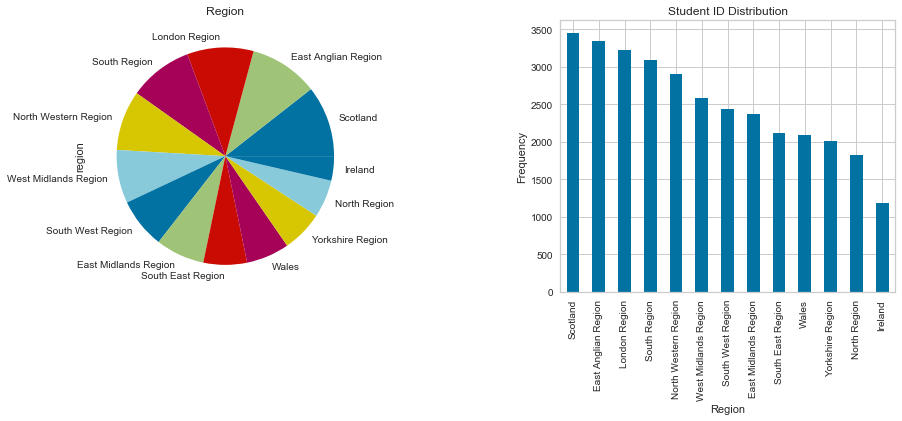

In [9]:
#data distribution of regions
presentation_counts = dfstudentinfo['region'].value_counts()
print (presentation_counts)

#created pie chart and histogram chart. Compare both visuals to see which is better at displaying the data.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
presentation_counts.plot(kind='pie')
plt.title('Region')

plt.grid(b=None)
plt.subplot(1,2,2)
presentation_counts.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Student ID Distribution')

# add more space between the two plots
plt.subplots_adjust(wspace=0.5)
#plt.savefig("~myplot.png")

Text(0.5, 1.0, 'Final Result Distribution Per Region')

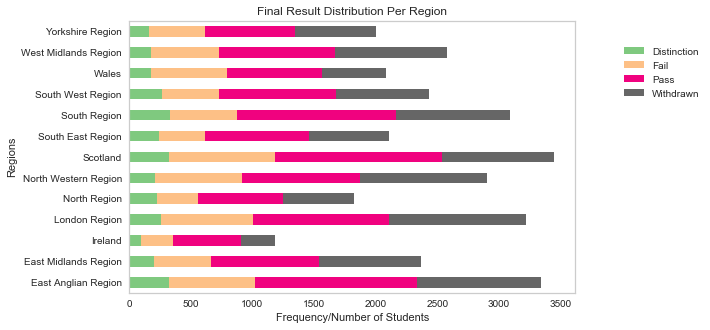

In [10]:
dfstudentinfo.groupby(['region','final_result']).size().unstack().plot(kind='barh',stacked=True, colormap='Accent', figsize = (8,5))
plt.grid(b=None)
plt.legend(loc = (1.1, 0.7)) 
plt.ylabel("Regions")
plt.xlabel("Frequency/Number of Students")
plt.title("Final Result Distribution Per Region")
#plt.savefig("~rft.png")

In [11]:
dfstudentinfo.groupby(['region', 'final_result'])['final_result'].count()

region                final_result
East Anglian Region   Distinction      327
                      Fail             698
                      Pass            1309
                      Withdrawn       1006
East Midlands Region  Distinction      200
                      Fail             462
                      Pass             881
                      Withdrawn        822
Ireland               Distinction       98
                      Fail             261
                      Pass             552
                      Withdrawn        273
London Region         Distinction      263
                      Fail             744
                      Pass            1099
                      Withdrawn       1110
North Region          Distinction      230
                      Fail             327
                      Pass             691
                      Withdrawn        575
North Western Region  Distinction      213
                      Fail             704
                   

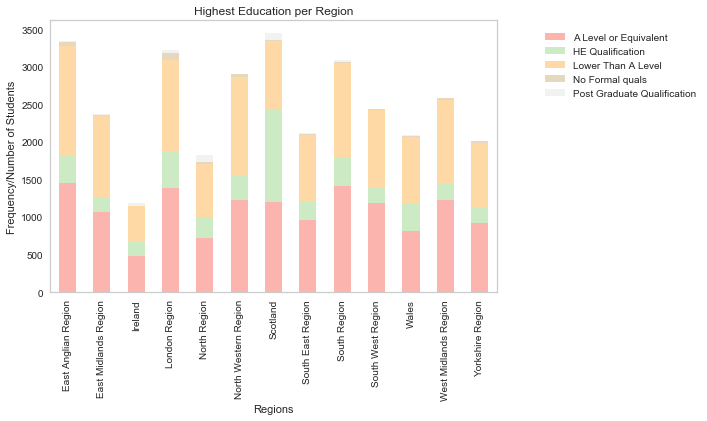

In [12]:
dfstudentinfo.groupby(['region','highest_education']).size().unstack().plot(kind='bar',stacked=True, colormap = 'Pastel1', figsize =(8,5))
plt.grid(b=None)
plt.legend(loc = (1.1, 0.7)) 
plt.ylabel("Frequency/Number of Students")
plt.xlabel("Regions")
plt.title("Highest Education per Region")
plt.show()

Text(0.5, 1.0, 'Final Result Distribution Per Code Module')

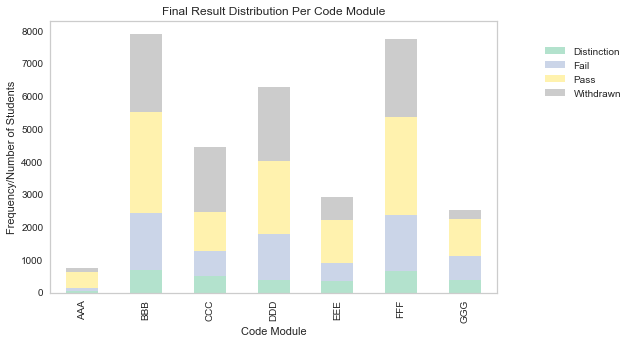

In [13]:
dfstudentinfo.groupby(['code_module','final_result']).size().unstack().plot(kind='bar',stacked=True, colormap = 'Pastel2',figsize = (8,5))
plt.grid(b=None)
plt.legend(loc = (1.1, 0.7)) 
plt.ylabel("Frequency/Number of Students")
plt.xlabel("Code Module")
plt.title("Final Result Distribution Per Code Module")
#plt.savefig("~rft.png")


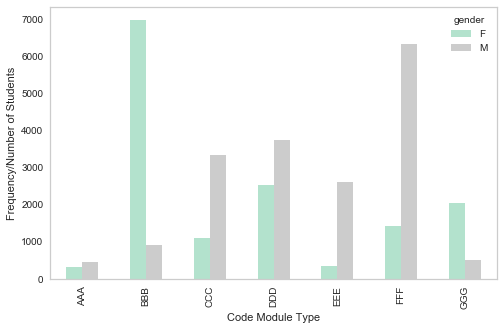

In [14]:
dfstudentinfo.groupby(['code_module','gender']).size().unstack().plot(kind='bar',stacked=False, colormap='Pastel2', figsize = (8,5))
plt.grid(b=None)
plt.ylabel("Frequency/Number of Students")
plt.xlabel("Code Module Type")

plt.show() 

In [15]:
dfstudentinfo.groupby(['code_module', 'gender'])['gender'].count()

code_module  gender
AAA          F          314
             M          434
BBB          F         6991
             M          918
CCC          F         1101
             M         3333
DDD          F         2518
             M         3754
EEE          F          337
             M         2597
FFF          F         1414
             M         6348
GGG          F         2043
             M          491
Name: gender, dtype: int64

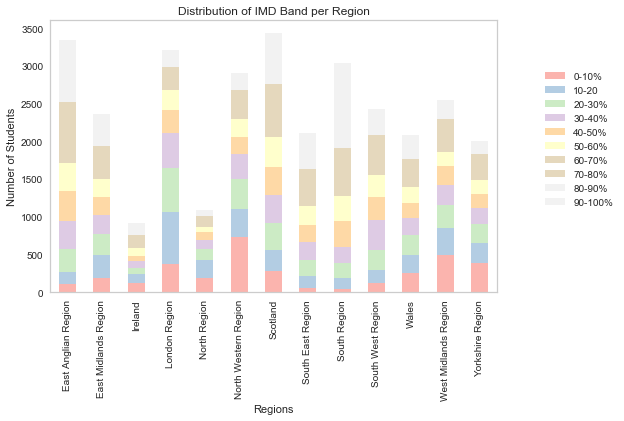

In [16]:
#check pass and fail ratio for students in diffent regions
dfstudentinfo.groupby(['region','imd_band',]).size().unstack().plot(kind='bar',stacked=True, colormap = 'Pastel1', figsize = (8,5))
plt.grid(b=None)
plt.legend(loc = (1.1, 0.3)) 
plt.ylabel("Number of Students")
plt.xlabel("Regions")
plt.title("Distribution of IMD Band per Region")
plt.show()


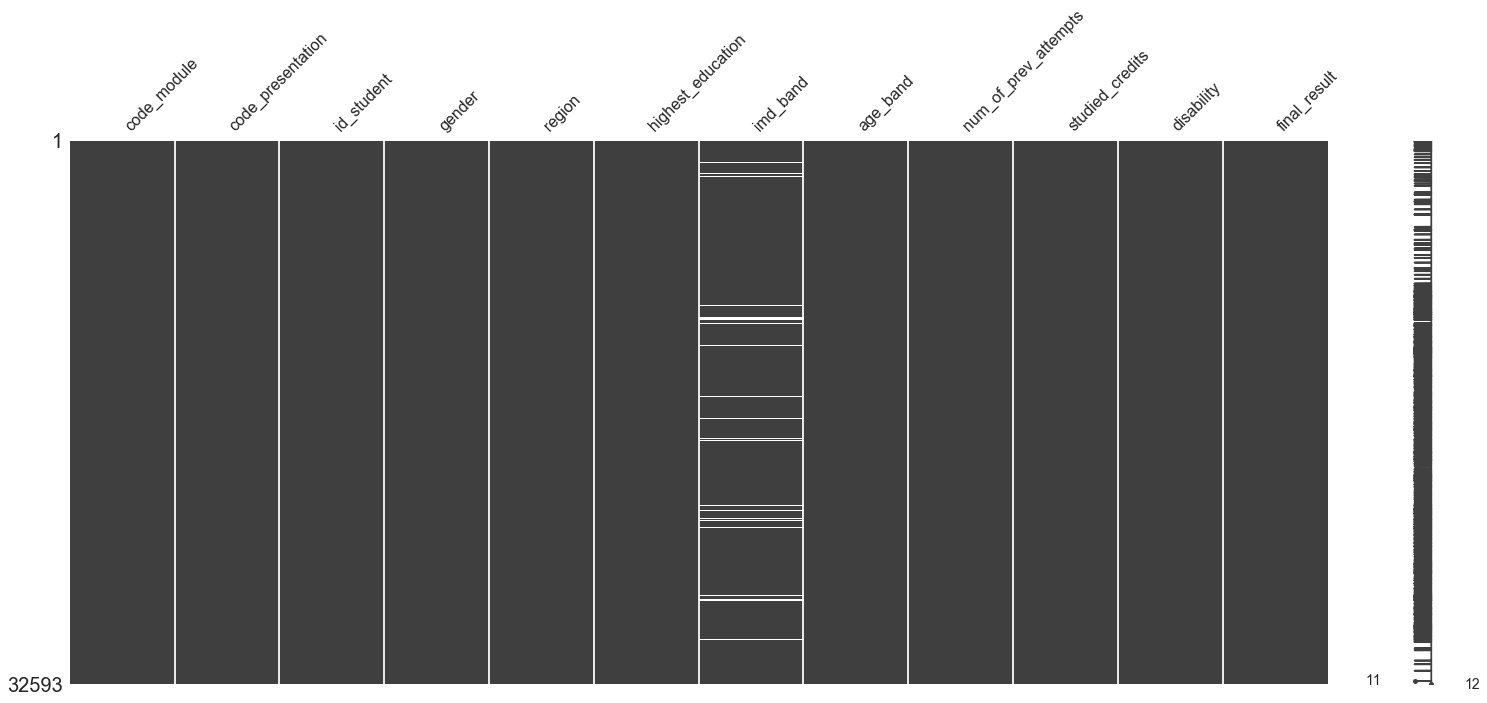

In [17]:
#examine missing values in dataset 
mn.matrix(dfstudentinfo)

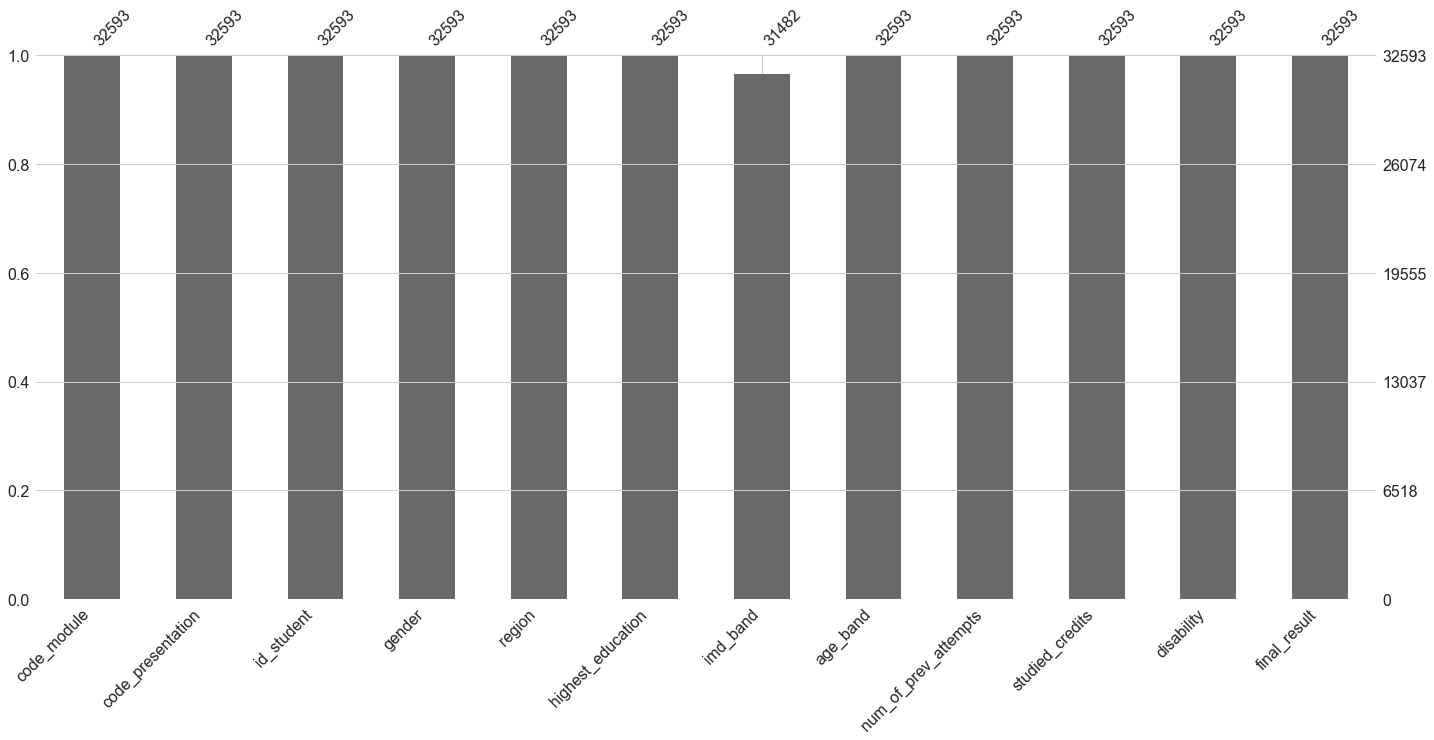

In [18]:
#counts of missing values and all rows
mn.bar(dfstudentinfo)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125db9518>,
      dtype=object)

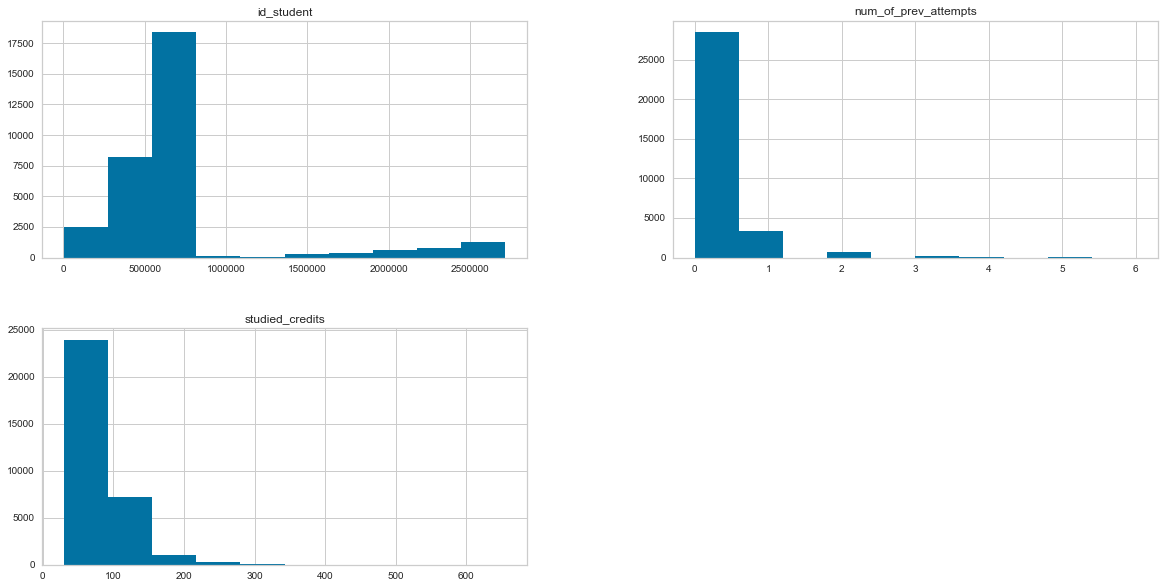

In [19]:
dfstudentinfo.hist(figsize=(20,10)) # Histogram for all features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129445b38>,
      dtype=object)

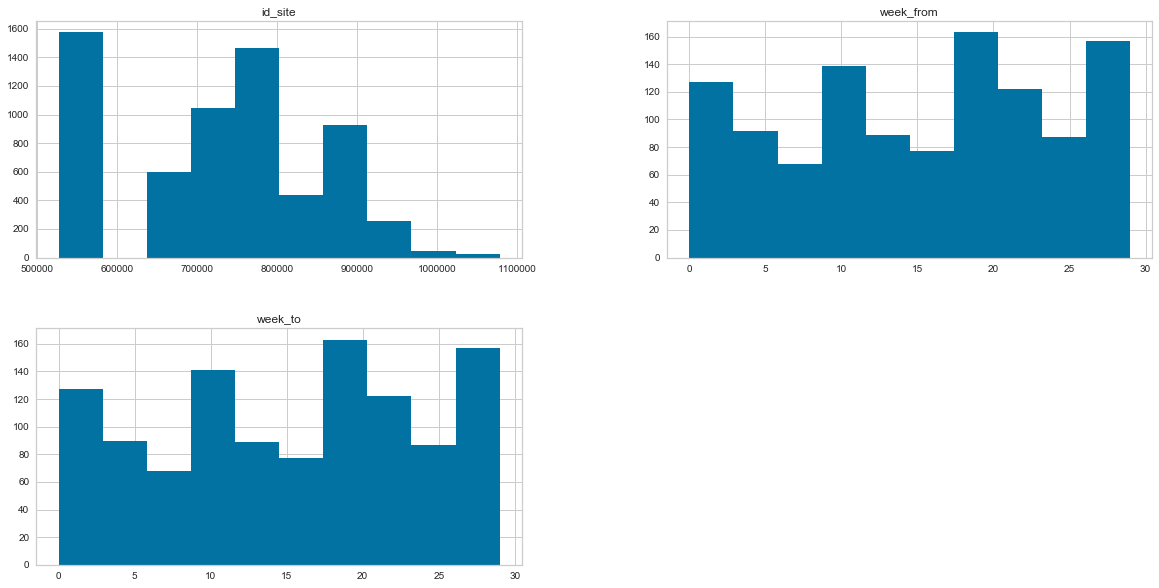

In [20]:
dfvle.hist(figsize=(20,10)) # Histogram for all features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1269e7438>,
      dtype=object)

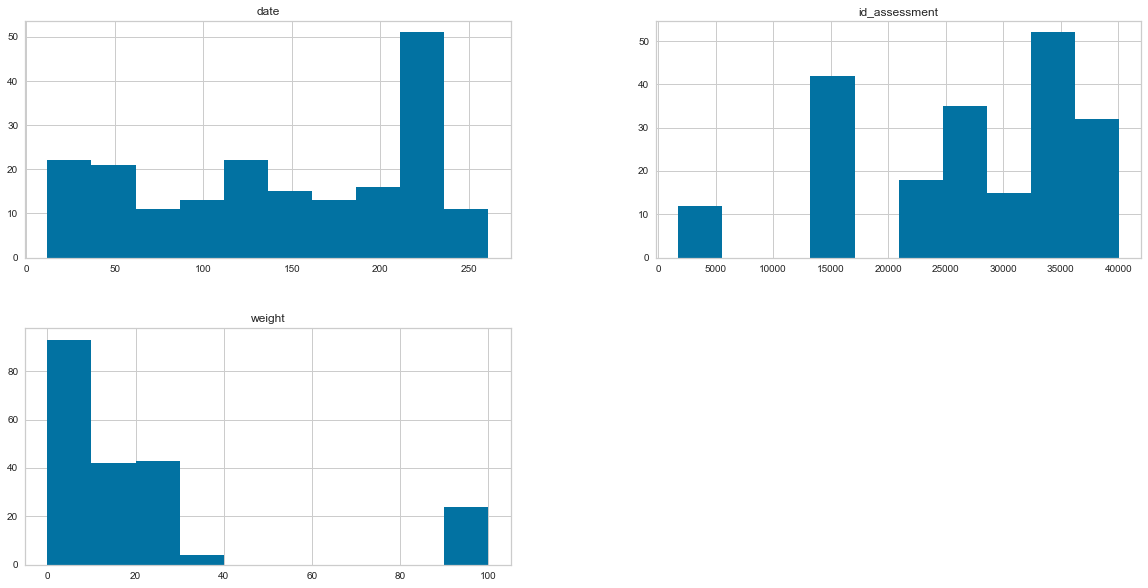

In [21]:
dfasses.hist(figsize=(20,10)) # Histogram for all features